# Video Game Sales Data Analysis and Visualisation

### Abstract

For video game retailers, it is necessary to analyze the market, identify patterns that determine the success of games. Understanding sales trends by platform and genre, and user profiles based on region will allow retailers to place a bet on a potentially popular product and plan advertising campaigns that will help to boost the store's business.

In this project, we will be cleaning and wrangling a dataset of over 16000 records of video game sales data in python pandas, preparing it for exploratory analysis. Thereafter, we will utilise the seaborn and matplotlib libraries to visualise aspects of this dataset, such as the sales by platform, genre and publisher. We will also observe the breakdown of these categories by region.

### About the Dataset

The data is taken from the Video Game Sales dataset on [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales) vgsales.csv file generated by a scrape of [vgchartz.com](vgchartz.com). It contains a list of video games with physical sales greater than 100,000 copies from 1980 to 2016.

Fields include:
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

### Table of Contents:
1. Data Acquisition
2. Data Preprocessing
3. Exploratory Data Analysis
4. Conclusions

***

## 1. Data Acquisition

### 1.1 Importing the Data

First, let's examine the dataset that will be used in this project.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

Using the pandas library, we will read the vgsales.csv file and store it in the games_df variable.

In [2]:
# read in data
games_df = pd.read_csv('vgsales.csv')

### 1.2 General Information About games_df

What do the first 10 rows of data look like?

In [3]:
# preview first 10 rows of data
games_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 11
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,NaN
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,NaN
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,NaN
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,NaN
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN


How about the entire dataset? Let's summarize some general information about the dataset.

In [4]:
# get information on the dataset
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16594 entries, 0 to 16593
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16594 non-null  int64  
 1   Name          16594 non-null  object 
 2   Platform      16594 non-null  object 
 3   Year          16324 non-null  object 
 4   Genre         16594 non-null  object 
 5   Publisher     16536 non-null  object 
 6   NA_Sales      16594 non-null  object 
 7   EU_Sales      16594 non-null  float64
 8   JP_Sales      16594 non-null  float64
 9   Other_Sales   16594 non-null  float64
 10  Global_Sales  16594 non-null  float64
 11  Unnamed: 11   26 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [5]:
# get statistical description of dataset
games_df.describe()

,Rank,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 11
count,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,26.000000
mean,8299.409967,0.146690,0.077745,0.048128,0.537467,0.057308
std,4791.349951,0.505406,0.309332,0.188608,1.555224,0.052120
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4150.250000,0.000000,0.000000,0.000000,0.060000,0.020000
50%,8299.500000,0.020000,0.000000,0.010000,0.170000,0.045000
75%,12447.750000,0.110000,0.040000,0.040000,0.470000,0.075000
max,16600.000000,29.020000,10.220000,10.570000,82.740000,0.210000


Let's consider this information in more detail.

We see that there are 12 columns in the table consisting of three data types:
- non-null int64 (1 column)
- non-null object (6 columns)
- non-null float64 (5 columns).

The number of values in each columns varies. This indicates that there are missing values in some columns. Specifically, the Year, Publisher and Unnamed:11 columns.

Here, we come across something that is unexpected. According to the information provided on the kaggle page for this dataset, the data has 16594 rows and 11 columns. However, we can see here that our dataset has an additional 12th column labeled Unnamed:11 with only 26 values.

Taking a closer look, we also notice that the NA_Sales has a type of 'non-null object'. This is curious, because the data types of all other sales columns are non-null float64.

From the statistical description, we are able to observe information on the numerical data in this dataset. We can see that the highest profit from a single game globally is 82m USD, which is significantly more than the average global profit of 0.5m USD. On average, the profits from the EU market are larger than that of the JP market, which is larger than other markets. Note that the statistics for US_sales are not in the table. This is most likely because the US_Sales column has non-null object type values instead of strictly numerical values. 

Nevertheless, our brief overview of the dataset is now complete.

### 1.3 Summary

Let's summarize: Observing the dataset, we can see that each record in this dataset contains historical game sales data, the year of release of each game, as well as the genres and platforms they were released on.

The columns Genre, Platform, Year and the breakdown of sales by region are particularly valuable. Based on these columns, we will be able to track how user preferences have changed over time, and to compile a portrait of a user in each region, or by platform and genre.

Before we can do that, we will have to clean and wrangle the data. We have already identified three main problems that need to be addressed in the next section:
1. We have 3 columns (Year, Publisher and Unnamed:11) with a measure of missing values.
2. We have an additional column that is unnamed, containing data that is unknown.
3. The column NA_Sales uses a data type that is different from the rest of the sales data.

In the following section, we will clean the dataset and tackle these issues. The affected records will be investigated and fixed, or if necessary, deleted.

***

## 2. Data Pre-processing

In this section, we will be replacing column names, investigating the unnamed column, converting the data to the appropriate types, checking the data for null values or duplicates, and filling in (or deleting) the missing values where possible.

### 2.1 Renaming Columns

Let's start by getting a list of column names.

In [6]:
# get column names
games_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Unnamed: 11'],
      dtype='object')

The column names are capitalized. For convenience's sake, let's rename the columns. Then, check the results.

In [7]:
# update column names
games_df = games_df.rename(columns=lambda x: x.lower())

# get column names
games_df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'unnamed: 11'],
      dtype='object')

### 2.2 Investigating the Unnamed Column

Let's take a closer look at the fraction of the dataset with the unnamed column.

In [8]:
# get rows with values in the ['unnamed: 11'] column
games_df[~games_df['unnamed: 11'].isna()].head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,unnamed: 11
7317,7320,Steins,Gate,PSV,2013,Adventure,PQube,0.07,0.09,0.00,0.05,0.21
7762,7765,Steins,Gate,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.19,0.00,0.19
9966,9969,Hyperdimension Neptunia Re,Birth 3,PSV,2014,Action,Idea Factory International,0.07,0.01,0.00,0.03,0.12
10380,10383,Robotics,Notes,PS3,2012,Adventure,5pb,0.00,0.00,0.11,0.00,0.11
11132,11135,Hyperdimension Neptunia Re,Birth 2,PSV,2014,Action,Idea Factory International,0.05,0.02,0.00,0.02,0.09


With just 5 rows of the affected data, we can see that there is already a noticeable pattern: The game titles that would normally take up one column under ['name'] has been split into two columns. This has caused all subsequent values to be shifted to the right by one column. 

Most likely, this was an issue that occurred during the downloading of the data. It is possible to download the dataset again from scratch. However, shifting these values back to their appropriate columns is a simple task so we will do that instead.

Let's start by creating a copy of this dataframe section to work on.

In [9]:
# create a new dataframe for the specific records
shifted_df = games_df[~games_df['unnamed: 11'].isna()]

First, combine the titles in the ['name'] and ['platform'] columns into 1 column.

In [10]:
shifted_df['name'] = shifted_df['name'] + ' ' + shifted_df['platform']

# get a short preview of the updated data
shifted_df.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,unnamed: 11
7317,7320,Steins Gate,Gate,PSV,2013,Adventure,PQube,0.07,0.09,0.00,0.05,0.21
7762,7765,Steins Gate,Gate,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.19,0.00,0.19
9966,9969,Hyperdimension Neptunia Re Birth 3,Birth 3,PSV,2014,Action,Idea Factory International,0.07,0.01,0.00,0.03,0.12
10380,10383,Robotics Notes,Notes,PS3,2012,Adventure,5pb,0.00,0.00,0.11,0.00,0.11
11132,11135,Hyperdimension Neptunia Re Birth 2,Birth 2,PSV,2014,Action,Idea Factory International,0.05,0.02,0.00,0.02,0.09


Once the ['name'] column has been updated successfully, we can work on moving the remaining values back to the proper columns. We will use the `df.shift()` function to move our selected columns 1 position to the left. Then, check for null values in the unnamed column.

In [11]:
# shift columns idx 3-11 to the left by 1
shifted_df.iloc[:, 2:] = shifted_df.iloc[:, 2:].shift(-1, axis=1)

# check for null values 
shifted_df['unnamed: 11'].notnull().sum()

0

There are no more non-null values in the unnamed column. This tells us that all the values were succesfully corrected. Now,  we can proceed to update the corrupted section of the main data.

In [12]:
# update main data
games_df.update(shifted_df)
games_df.loc[shifted_df.index]=shifted_df

# check a section of the replaced data
games_df.loc[shifted_df.index].head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,unnamed: 11
7317,7320.0,Steins Gate,PSV,2013,Adventure,PQube,0.07,0.09,0.00,0.05,0.21,NaN
7762,7765.0,Steins Gate,PSP,2011,Adventure,Kadokawa Shoten,0.0,0.00,0.19,0.00,0.19,NaN
9966,9969.0,Hyperdimension Neptunia Re Birth 3,PSV,2014,Action,Idea Factory International,0.07,0.01,0.00,0.03,0.12,NaN
10380,10383.0,Robotics Notes,PS3,2012,Adventure,5pb,0.0,0.00,0.11,0.00,0.11,NaN
11132,11135.0,Hyperdimension Neptunia Re Birth 2,PSV,2014,Action,Idea Factory International,0.05,0.02,0.00,0.02,0.09,NaN


Now, we can drop the unnamed column from the main dataframe. Also, let's convert ['na_sales'] back to float64 type.

In [13]:
# drop unnamed column
games_df = games_df.drop('unnamed: 11', axis=1)

# convert na_sales to float64
games_df['na_sales'] = games_df['na_sales'].astype('float')

### 2.3 Check for Duplicate Records and Missing Data

Let's check for duplicate records. If there are any, we will delete them.

In [14]:
# get number of duplicates
games_df.duplicated().sum()

0

No duplicate records are found. Let's move on to checking for missing values.

In [15]:
# get number of missing values
games_df.isnull().sum()

rank              0
name              0
platform          0
year            270
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Earlier, we noted that there were missing values in 3 columns. The unnamed column has since been removed. Now let's tackle the missing values in ['year'] and ['publisher']

### 2.4 Missing Values In ['year']

Let's look at the missing values in the ['year'] column.

In [16]:
# get rows with missing values in ['year'] column
games_df[games_df['year'].isna()].head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180.0,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378.0,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432.0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471.0,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608.0,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


We are missing the year of release data for 270 games. Note that some video game titles contain the year of release of the game. For example, FIFA Soccer 2004 was released in 2004. Following this logic, we can find replacements for some missing data in the ['year'] column.

Let's search for such strings and create a dictionary, where the key will be the index of game titles that contain their release year, and the release year itself will be the value.

In [17]:
idx_year = {} 

# iterate over rows with missing year information
for row in games_df[games_df['year'].isna()].itertuples():
    for item in row.name.split(' '):  # split game title into separate words
        if item == row.name.split(' ')[-1]:  # take the last word in the list
            try:  
               
                # if the last word is a number then
                if len(item) == 2 or len(item) == 4: # check length of last word
                    item = int(item)  # convert to integer type
                    
                    # if last number is 2 digits, make a full year by adding the century
                    if item < 21: item += 2000
                    elif item > 80 and item < 100: item += 1900
                    
                    # if last number is 4 digits, check that it is more than 1980 
                    if item >= 1980: idx_year[row.Index] = item
           
            except:  
                #if the last word is not a number then
                continue
            
            
# check output of the resulting dictionary
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 179   | year: 2004
index: 377   | year: 2004
index: 470   | year: 2006
index: 1303  | year: 1999
index: 1649  | year: 2003
index: 2484  | year: 2007
index: 2776  | year: 2011
index: 3421  | year: 2006
index: 3501  | year: 2002
index: 4199  | year: 2007
index: 4797  | year: 2003
index: 5162  | year: 2003
index: 5669  | year: 2005
index: 5901  | year: 2003
index: 8929  | year: 2005
index: 12921 | year: 2011
index: 13869 | year: 2006
index: 15737 | year: 2007
index: 15863 | year: 2008
index: 16056 | year: 2008


Now that we have obtained release years from the game titles, let's replace the missing release years for these games.

In [18]:
# iterate over the dictionary and replace the missing values
for key, value in idx_year.items():
    games_df.loc[key, 'year'] = value

We then check the number of rows in the ['year'] column that still contain missing values.

In [19]:
# get number of rows with missing values
len(games_df[games_df['year'].isna()])

250

Now we are missing the year of release data for 250 games. This is less than after the previous check, which means the replacements were completed successfully. It's possible to find the year of release for the remaining 250 games by searching the Internet, but 250 rows is only about 1.5% of the total amount of data, which shouldn't significantly affect the results of the study. Hence it's acceptable to simply remove these records and continue working with the existing dataset. If at some point we realize that we don't have enough data for analysis, we can then return to the issue of searching the Internet to find the missing information.

In [20]:
# delete rows with missing data  in ['year'] and reset indexes
games_df = games_df.dropna(subset=['year']).reset_index(drop=True)

# convert year column to int
games_df['year'] = games_df['year'].astype('int')

In [21]:
# check the number of missing values in the dataset
games_df.isnull().sum()

rank             0
name             0
platform         0
year             0
genre            0
publisher       38
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

### 2.5 Missing Values in ['publisher'].

Let's look at the missing values in the ['publisher'] column.

In [22]:
# get rows with missing values for ['publisher']
games_df[games_df['publisher'].isna()].head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
469,471.0,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1294,1305.0,Triple Play 99,PS,1999,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1649,1664.0,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2199,2224.0,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3124,3161.0,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3131,3168.0,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3724,3768.0,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4474,4528.0,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4581,4636.0,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.0,0.01,0.42
5579,5649.0,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.0,0.01,0.32


A large portion of the missing data are Game Boy Advance Videos. The vgchartz [database](https://www.vgchartz.com/games/games.php?name=Video&keyword=&console=GBA&region=All&developer=&publisher=&goty_year=&genre=Misc&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=50&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&showdeveloper=0&showcriticscore=0&showcriticscore=1&showpalsales=0&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showlastupdate=0&showlastupdate=1&showothersales=0&showshipped=0&showshipped=1) in 2023 lists the publisher of GBA Videos as Majesco, excepting Pokemon GBA Videos published by Nintendo. Thus, we will go ahead and update the publisher for these GBA Videos to Majesco.

In [23]:
# update missing publishers of GBA Videos to Majesco
games_df.loc[games_df['publisher'].isna() & 
             games_df['name'].str.contains('|'.join(["Game Boy Advance Video", "Gameboy Advance Video"])), 
            'publisher'] = 'Majesco'

Then check the rows in ['publisher'] that still contain missing values.

In [24]:
len(games_df[games_df['publisher'].isna()])

16

Now we are missing the publisher data for 16 games.

Like the missing data in ['year'], it's possible to find the data via Internet search, but 16 rows is an even smaller fraction of the current data. Hence we will also remove these records with missing values and move on.

In [25]:
# delete rows with missing data in ['publisher'] and reset indexes
games_df = games_df.dropna(subset=['publisher']).reset_index(drop=True)

In [26]:
# check the number of missing values in the dataset
games_df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

### 2.6 Summary

In this section, the column names were replaced, the extra column was removed and the affected data shifted back to the correct columns, and work was carried out to find and replace missing values.

The extra column was a result of data being pushed 1 column to the right, due to errors in recording game titles. We took steps to combine the names back into a single column and shift the rest of the data back. 

We also encountered missing values in the ['year'] and ['publisher'] columns. In both the ['year'] and ['publisher'] columns, the number of missing values was not significant. Some of the values were restored by taking information directly from the names of the games or from the Internet, and the rest of the data were omitted due to their low volume and inability to influence the study as a whole.

There are no more extra columns and no more missing values. The data is prepared for further analysis.

***

## 3. Exploratory Data Analysis

In this section, we will consider the distribution of games by year of release and global sales by year, genre, platform and publisher. Then we will dive deeper into the breakdown of such sales by region in order to gain a better understanding of user profiles based on region.

### 3.1 Distribution of Games Released per Year

Let's see how many games were released over the years. We do this by grouping up the data by year, then counting the number of games per year.

In [27]:
# number of released games grouped by release year
games_per_year = games_df.groupby('year', as_index=False).name \
                         .count() \
                         .rename(columns={'name': 'num_of_games'}) \
                         .sort_values('year', ascending=True)

Now let's build a bar chart of the distribution of the number of games released by year.

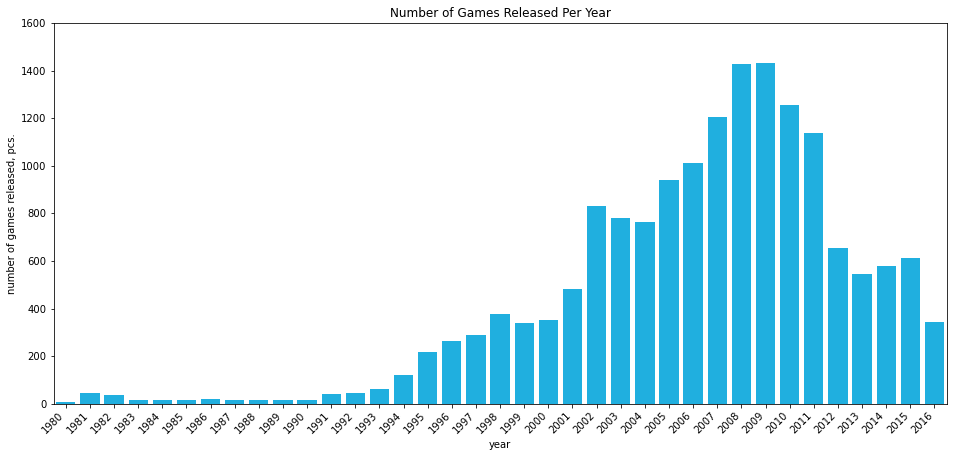

In [28]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=games_per_year['year'],
                 y=games_per_year['num_of_games'],
                 orient='v',
                 color='deepskyblue');

# set axis labels and title
plt.ylabel('number of games released, pcs.')
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0,1600)
plt.title('Number of Games Released Per Year');

This graph shows that the bulk of games were released in the first decade of the 21st century, with a peak in 2008-2009. After 2011, the number of games released decreased significantly. When we consider that the sales data tracks physical sales releases, we can deduce this decline is most likely due to the increasing in popularity of digital releases for video games over time.

### 3.2 Trend of Game Sales per Year
Let's look at the distribution of total sales.

In [29]:
# number of sales grouped by release year
sales_per_year = games_df.groupby('year', as_index=False) \
                         .agg({'global_sales': 'sum'}) \
                         .sort_values('year', ascending=True)

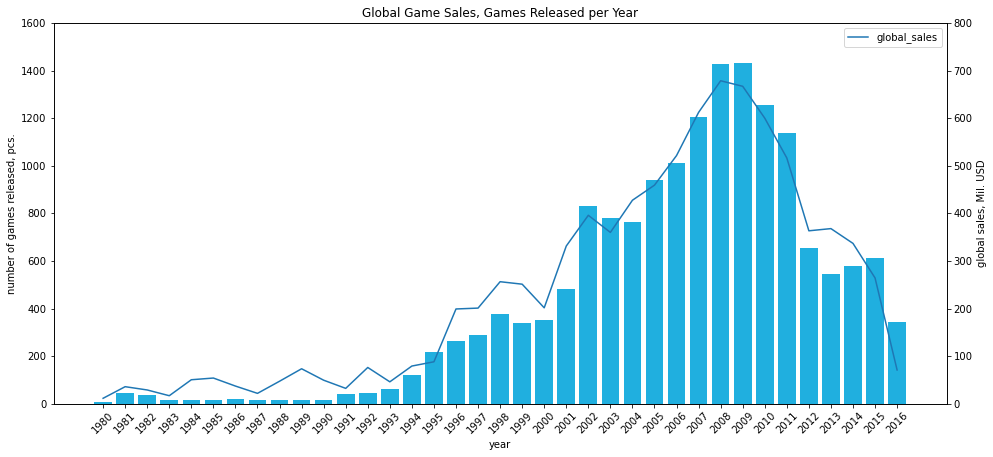

In [30]:
# plot size
fig, ax1 = plt.subplots(figsize=(16, 7))

# plot bar, line charts
ax1 = sns.barplot(x='year', y='num_of_games', data = games_per_year, color='deepskyblue')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=ax1.get_xticks(), y='global_sales', sort=False, data = sales_per_year, ax=ax2)

# set axis labels and title
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=45)
ax1.set_title('Global Game Sales, Games Released per Year');
ax1.set_ylabel('number of games released, pcs.')
ax2.set_ylabel('global sales, Mil. USD')
ax1.set_ylim(0,1600)
ax2.set_ylim(0,800)

plt.legend(['global_sales'])
plt.show()

In general, the trend of global sales closely follows the trend of the release of new games, with values increasing in the early 2000s, when the computer games industry was beginning to grow, reaching a peak in 2008-2009 and experiencing a sharp decline shortly after.

Let's consider a breakdown of sales by region now.

In [31]:
# regional sales grouped by platform
plf_sales_region = games_df[['year', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']] \
                       .groupby('year', as_index=False) \
                       .agg({'global_sales':'sum','na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum'}) \
                       .melt(id_vars=['year']) \
                       .sort_values('value', ascending=False)

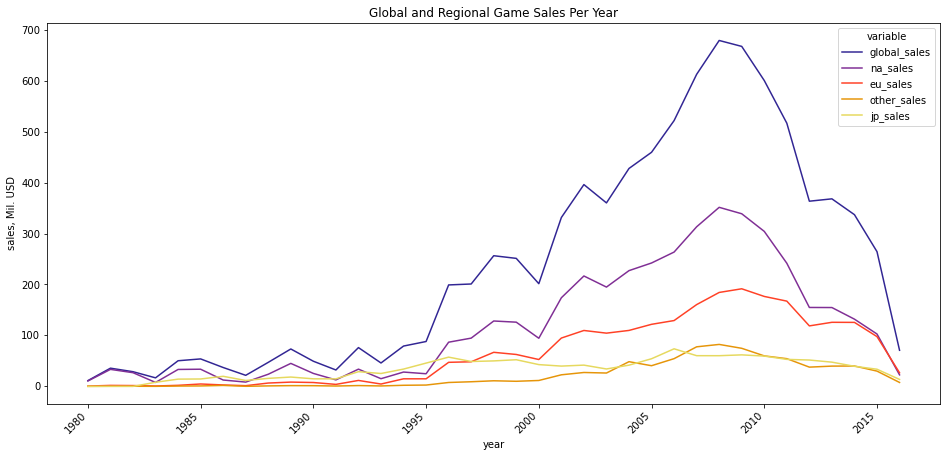

In [32]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
sns.lineplot(x=plf_sales_region['year'],
             y=plf_sales_region['value'],
             hue=plf_sales_region['variable'],
             palette='CMRmap');

# set axis labels and title
plt.ylabel('sales, Mil. USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global and Regional Game Sales Per Year');

Naturally, a good portion of regional sales follow the trend of global sales. We can see that NA sales, EU sales and sales from other regions have a profile similar to that of the global sales, with explosive growth in the years up to 2009 and declining after. On the other hand, the trend of sales in the JP market seem to remain largely the same starting as early as 1995 and continuing throughout the 21st century.

Let's also look at the breakdown of overall sales by region.

In [33]:
# regional sales
plf_sales_pie = pd.DataFrame({'region':['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                              'total_sales':[sum(games_df['na_sales']), 
                                             sum(games_df['eu_sales']), 
                                             sum(games_df['jp_sales']), 
                                             sum(games_df['other_sales'])]})
plf_sales_pie['percentage'] = plf_sales_pie['total_sales']/sum(plf_sales_pie['total_sales'])*100
plf_sales_pie.sort_values(by='percentage',ascending=False,inplace=True)

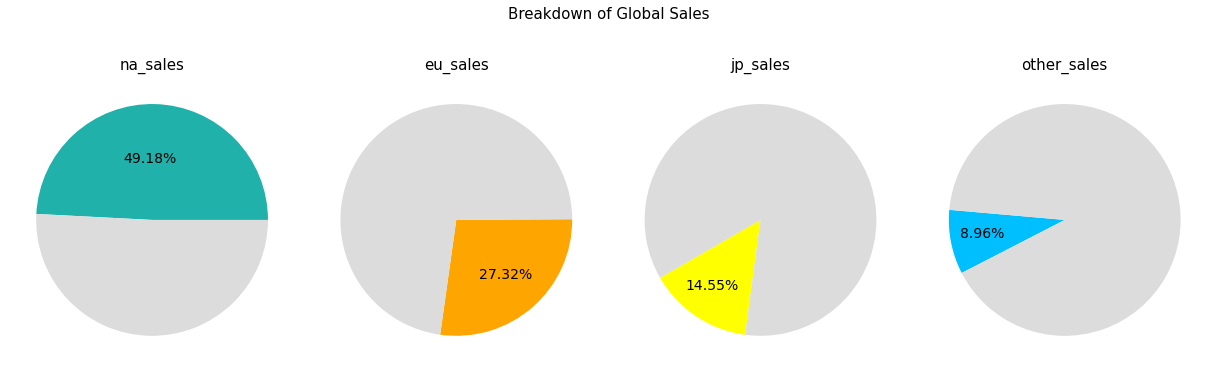

In [34]:
fig = plt.figure(figsize=(17, 8))

# subplots
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# plot 1
ax1.pie([plf_sales_pie['percentage'][0],100-plf_sales_pie['percentage'][0]],startangle=0,
        colors=['lightseagreen','gainsboro'])
ax1.text(-0.25,0.5,f"{round(plf_sales_pie['percentage'][0],2)}%",fontsize=14)

# plot 2
ax2.pie([plf_sales_pie['percentage'][1],100-plf_sales_pie['percentage'][1]],startangle=262,
        colors=['orange','gainsboro'])
ax2.text(0.2,-0.5, f"{round(plf_sales_pie['percentage'][1],2)}%",fontsize=14)

# plot 3
ax3.pie([plf_sales_pie['percentage'][2],100-plf_sales_pie['percentage'][2]], startangle=210,
        colors=['yellow','gainsboro'])
ax3.text(-0.65,-0.6,f"{round(plf_sales_pie['percentage'][2],2)}%",fontsize=14)

# plot 4
ax4.pie([plf_sales_pie['percentage'][3],100-plf_sales_pie['percentage'][3]],startangle=175,
        colors=['deepskyblue','gainsboro'])
ax4.text(-0.9,-0.15,f"{round(plf_sales_pie['percentage'][3],2)}%",fontsize=14)

# set titles
ax1.set_title('na_sales',fontsize=15)
ax2.set_title('eu_sales',fontsize=15)
ax3.set_title('jp_sales',fontsize=15)
ax4.set_title('other_sales',fontsize=15)
fig.suptitle('Breakdown of Global Sales', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.2, wspace=0.05)

# show plot
fig.show()

At 49.18%, the NA market is by far the most profitable region for video game sales, followed by EU at 27.32%, then JP and other regions.

Next, consider the distribution of sales by platform. Let's define platforms that were popular then and now and evaluate the life cycle of platforms.

### 3.4 Distribution of Game Sales by Platform

Let's take a look at global game sales by platform.

In [35]:
# number of sales grouped by platform
plf_sales = games_df.groupby('platform', as_index=False) \
                    .agg({'global_sales': 'sum'}) \
                    .sort_values('global_sales', ascending=False)

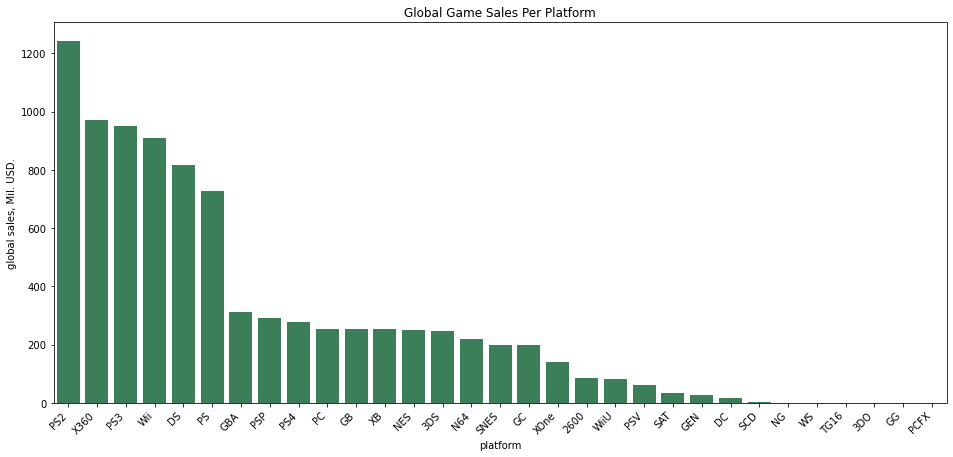

In [36]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=plf_sales['platform'],
                 y=plf_sales['global_sales'],
                 orient='v',
                 color='seagreen');

# set axis labels and title
plt.ylabel('global sales, Mil. USD.')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales Per Platform');

The graph shows the leaders in total global sales: PS2, X360, PS3, Wii, DS, PS. These platforms lead by two to four times as much compared to the next highest-earning platforms. The data of the top 6 platforms is the main contender for detailed further analysis.

To assess the trend of platform popularity over the years, we will select platforms whose total sales exceed the median value, i.e. Let's take the first half of the list ranked by world sales.

In [37]:
# create a list of platform names with total global sales greater than the median
platforms_above_median = []

for row in plf_sales.itertuples(): # iterate over the dataframe
     if row.global_sales > plf_sales.global_sales.median(): # compare sales values with median
         platforms_above_median.append(row.platform) # add the platform name to the list

# check result (list of platform names)
print(platforms_above_median)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC', 'GB', 'XB', 'NES', '3DS', 'N64']


Then, plot the distribution of game sales per platform per year.

In [38]:
# grouping data by years and platforms and calculating total global sales
plf_sales_year = games_df.query('platform in @platforms_above_median') \
                         .groupby(['year', 'platform'], as_index=False) \
                         .agg({'global_sales': 'sum'}) \
                         .sort_values('year', ascending=True)

plf_sales_year = pd.pivot_table(plf_sales_year, values='global_sales', index=['year'], columns=['platform'])

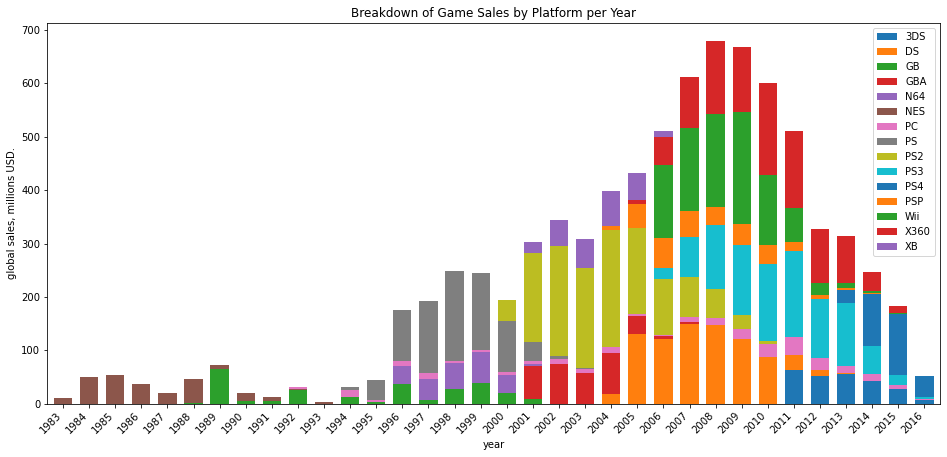

In [39]:
# figure size
fig, ax = plt.subplots(figsize = (16, 7))

# plot
plf_sales_year.plot.bar(stacked = True, 
                        ax = ax,
                        width = 0.7)

# set y-axis label
plt.ylabel('global sales, millions USD.')
plt.title('Breakdown of Game Sales by Platform per Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Let's also visualise the distribution of the life cycle of video game platforms. We will consider the main statistics of the resulting indicator.

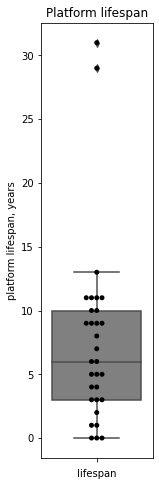

In [40]:
# calculate platform lifetime
life_span = games_df.groupby('platform').year.max() - games_df.groupby('platform').year.min()

# mark up space for plotting
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(2, 8))

# plotting and designing a chart (boxplot + value points (swarmplot))
sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')

# axis labels and chart name
ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

In [41]:
# basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.612903
std       7.088382
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year, dtype: float64

From the bar graph, we can see clearly that some platforms increase and decrease in popularity over time. For example, the PS3 gained a large amount of popularity from 2006-2011 before falling off in 2015. Other platforms retain a low level of popularity but for a long period of time, such as PC games, which make up a small portion of sales from 1994 and continues throughout the 21st century. We also see that the popularity of overall bestseller PS2 has in fact died off and its last sales were in 2011.

The box plot shows that there are two outliers, PC and DS, but otherwise, most of the data is situated within the interquartile range. Due to the presence of outliers, we will use the median value (6 years) instead of the mean to talk about the average value of the platform life cycle.

These visualisations show that it will be incorrect for our tasks to select data across the entire range of history as this will greatly distort the results of our research. Therefore, we will take another criterion for our sample: we will take only data within the last 6 years. Thus, our sample will include both platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.

Let's take the most relevant data, making a sample for the last 6 years (starting from 2010), and look at the breakdown of sales by platform per region.

In [42]:
# get sales from 2006 onwards
sample_df = games_df[games_df['year']>=2010]

In [43]:
plf_sales_region = sample_df[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
                       .groupby('platform', as_index=False) \
                       .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
                       .set_index('platform')

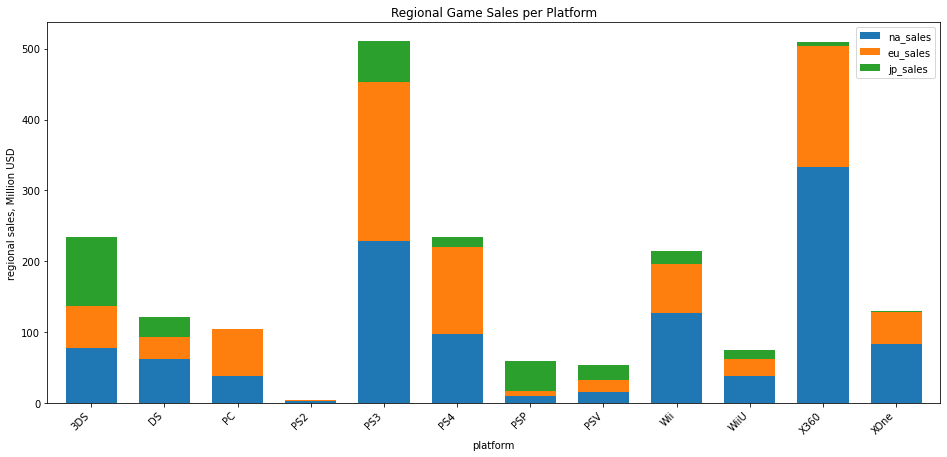

In [44]:
# plot size
fig, ax = plt.subplots(figsize = (16, 7))

# set x and y variables

'''ax = sns.barplot(x=plf_sales_region['platform'],
                 y=plf_sales_region['value'],
                 orient='v',
                 palette='viridis',
                 hue=plf_sales_region['variable']);'''

plf_sales_region.plot.bar(stacked = True, 
                          ax = ax,
                          width = 0.7)

# set axis labels and title
plt.ylabel('regional sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Regional Game Sales per Platform');

The list of top 5 platforms is as follows:
1. PS3
2. X360
3. PS4
4. 3DS
5. Wii

Further, we note that from 2010 onwards, the most popular platforms in the EU market are from the manufacturer Sony (PS3, PS4), in NA, the X360 by Microsoft, and in Japan, the 3DS by Nintendo.

### 3.5 Game sales by genre

Next, let's look at the general distribution of games by genre.

In [45]:
# global sales grouped by genre
genre_sales = sample_df.groupby(['genre'], as_index=False) \
                      .agg({'global_sales': 'sum'}) \
                      .sort_values('global_sales', ascending= False)

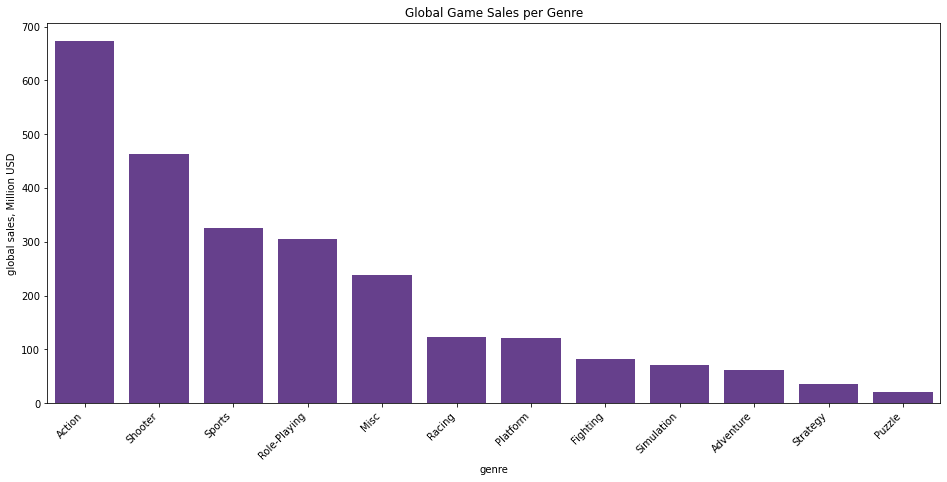

In [46]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=genre_sales['genre'],
                 y=genre_sales['global_sales'],
                 orient='v',
                 color='rebeccapurple');

# set axis labels and title
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales per Genre');

The most popular genres are Action, Shooter and Sports. The fourth place is occupied by the Role-Playing genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differ by almost ten times compared to other genres.

In [48]:
# regional sales grouped by genre
genre_sales_region = sample_df[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
                         .groupby('genre', as_index=False) \
                         .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
                         .melt(id_vars=['genre']) \
                         .sort_values('value', ascending=False)

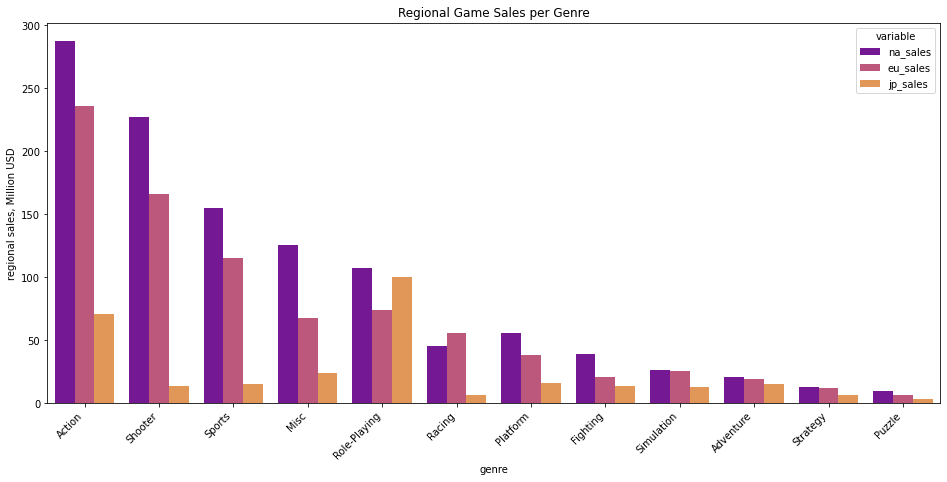

In [49]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=genre_sales_region['genre'],
                 y=genre_sales_region['value'],
                 orient='v',
                 palette='plasma',
                 hue=genre_sales_region['variable']);

# set axis labels and title
plt.ylabel('regional sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Regional Game Sales per Genre');

List of Top 5 most popular genres:
1. Action
2. Shooter
3. Sports
4. Role Playing
5. Misc

Note that in Japan market, shooters are much less popular in comparison with Europe and North America. In Japan, the most popular genres are Role-Playing and Action. It is also worth noting that the total sales of games of all genres in North America and Europe are approximately comparable, while JP sales account for less than half of all sales.

### 3.6 Game sales by publisher

In [54]:
# global sales grouped by publisher (top 15)
publish_sales = sample_df.groupby(['publisher'], as_index=False) \
                        .agg({'global_sales': 'sum'}) \
                        .sort_values('global_sales', ascending= False) \
                        .head(15)

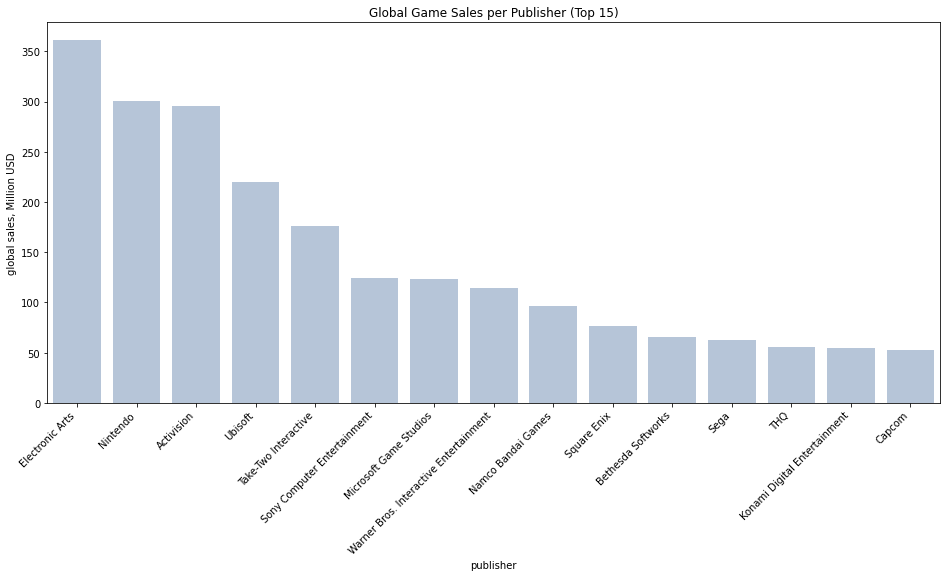

In [55]:
# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(x=publish_sales['publisher'],
                 y=publish_sales['global_sales'],
                 orient='v',
                 color='lightsteelblue');

# set axis labels and title
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title('Global Game Sales per Publisher (Top 15)');

In [56]:
# regional sales grouped by publisher
publish_sales_na = sample_df[['publisher', 'na_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'na_sales': 'sum'}) \
                         .sort_values(by='na_sales', ascending=False).head(10)

publish_sales_eu = sample_df[['publisher','eu_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'eu_sales': 'sum'}) \
                         .sort_values(by='eu_sales', ascending=False).head(10)

publish_sales_jp = sample_df[['publisher','jp_sales']] \
                         .groupby('publisher', as_index=False) \
                         .agg({'jp_sales': 'sum'}) \
                         .sort_values(by='jp_sales', ascending=False).head(10)

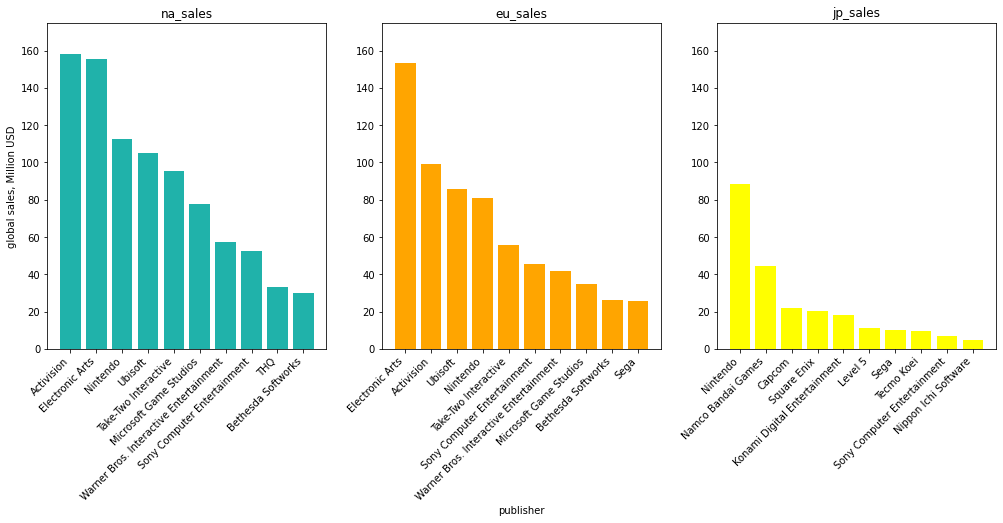

In [57]:
# plot size
plt.figure(figsize=(17, 6))

#plot 1: na
x = publish_sales_na['publisher']
y = publish_sales_na['na_sales']

plt.subplot(1, 3, 1)
plt.bar(x,y, color='lightseagreen')
plt.ylabel('global sales, Million USD')
plt.xticks(rotation=45, ha='right')
plt.title("na_sales")
plt.ylim(0, 175)

#plot 2: eu
x = publish_sales_eu['publisher']
y = publish_sales_eu['eu_sales']

plt.subplot(1, 3, 2)
plt.bar(x,y, color='orange')
plt.xlabel('publisher')
plt.xticks(rotation=45, ha='right')
plt.title("eu_sales")
plt.ylim(0, 175)

#plot 3: jp
x = publish_sales_jp['publisher']
y = publish_sales_jp['jp_sales']

plt.subplot(1, 3, 3)
plt.bar(x,y, color='yellow')
plt.xticks(rotation=45, ha='right')
plt.title("jp_sales")
plt.ylim(0, 175)

plt.show()

The top 5 publishers in NA and EU are extremely similar, albeit in slight differently order. On the other hand, Nintendo makes up the top sales in Japan by a large margin and other popular western publishers are not present at all.

We have already established that the JP playerbase differs from the western playerbase in terms of preference of video game genres. As video game publishers often produce games from similar genres, it is to be expected that there would be a difference in preference for publishers amoung regions as well.

### 3.7 Summary

At this stage, an exploratory analysis and visualisations of the data were carried out. The number of games released in different periods is certain (half of the games presented were released from 2007 to 2016).

The average life cycle of the popularity of gaming platforms (about 6 years) is noted.

The three most relevant platforms at the moment and in terms of perspectives for the next few years (PS3, X360, 3DS) have been identified. 

The most popular game genres over the past 6 years (Action, Shooter and Sports) have been found. 

It was also noted that a small number of hit games generates most of the total revenue. Sales of which are dozens of times higher than the sales of the average by the standards of the total world sales of games.

For regional differences, sales in NA make up almost half the profits of the video game market.

Each region has their own distinct preferences for platform, genres and publishers, though the preferences for genre and publisher in EU and NA do not differ by much. Nintendo is the most popular in both platform manufacturer and publisher for the Japanese playerbase by a significant margin.

***

## 4. Conclusions

In this project, we explored 16594 records of historical video game sales data from 1980 to 2016.

Of the 16594 rows, we filled 42 with release year and publisher data obtained from related data sources, and removed 266 more rows of missing data. Of the 12 columns, we discovered that one was a dummy columns. After correcting and transforming the data, we removed the dummy column.

Through exploratory analysis and visualization of the trends present in our data, we were able to determine the following:
- Half of all the recorded video games were released between 2007 and 2016.
- The peak of global sales and number of games released was 2008 to 2009. Since then, the video game industry appears to be in decline. 
- The life cycle of a video game platform has a median of about 6 years, though outliers such as PC gaming have lasted for almost 30 years. From the trends in the data, there may be a rise of the PS4, X360, DS3 platforms in the near future.
- The most popular genres over the past 5 years are: Action, Shooter, Sports, Role-Playing, Misc
- Most of the revenue from video game sales is generated by a small number of hit games, which sell for more than 10x other games
- The playerbase of NA and EU consumers are similar in preferences while JP consumers stand out in terms of platform choice and preferred genre. Thus when conducting business with each region, it may be beneficial to consider the historical and cultural differences as they are reflected in the players' preferences.

Some aspects of video game sales that may be confounders:
- The data only accounts for physical video game sales. This data does not consider the revenue generated by digital video game sales, subscription-based sales and free-to-play games with microtransactions. Therefore this data should not be used as a reflection of the state of the current video game market but merely for physical sales. 
- Wii Sports, the best-selling game in this dataset, [was bundled with every Wii console sold](https://www.denofgeek.com/games/wii-sports-best-selling-nintendo-game-ever-explained-retrospective/). Every Wii console sold essentially counted as a sale of Wii Sports as well. Undoubtedly, this has inflated the sales numbers of Wii Sports by a fair amount. However, it is difficult to tell by how much.

Ultimately, these are the recommendations made based on the analysed data:
- Bet on the sale of games for the PS4, XOne and DS3 platforms
- Give preference to games of the Action, Shooter and Role-Playing genres
- Take into account the specifics of the Asian market when launching advertising campaigns 
- In the long term, consider about business diversification and / or other sources of revenue.

### Further Research
These are avenues of research that may be of further interest:
- Comparisons of similarity between NA and EU markets. It may be worth attempting to determine the correlation between NA sales and EU sales given the similarities of each region's preferences.